* The Attention Mechanism is a technique that allows models to focus on the most important parts of input data when making predictions.

* It assigns different weights to different elements hence helping the model prioritize relevant information instead of treating all inputs equally.

* It forms the foundation of advanced models like Transformers and BERT

---

# Types of Attention Mechanisms

#### 1. Soft Attention:

* Soft attention is the most commonly used attention mechanism. It assigns a weight to each input part representing its "importance" for that task. These weights take a weighted average of the input data, enabling the model to focus on the most relevant parts.

* Commonly used in models like image captioning, machine translation and speech recognition.

#### 2. Hard Attention

* Hard attention makes a binary decision i.e instead of assigning weights to different parts of the input data, it selects specific parts of the input to focus on. This mechanism is more like making a decision to either focus on a certain element or ignore it completely.

#### 3. Self-Attention

* Self-attention is also known as intra-attention where the input sequence is compared to itself. Each element of the sequence interacts with all other elements in the sequence to compute dependencies between them. This helps models understand the context of each element in relation to all others.

* Used primarily in transformer models like BERT and GPT.

* n NLP when processing a sentence like "The dog ran across the field" self-attention allows the model to understand the relationship between "dog" and "field" even though they are not adjacent words. This helps the model understand the context better.

#### 4. Multi-Head Attention

* Multi-head attention is an extension of self-attention where multiple attention mechanisms i.e heads are applied in parallel. Each head learns different aspects of the input data allowing the model to capture various dependencies at different levels of abstraction.

* Crucial to the success of transformer models like BERT, GPT and others.

* Consider translating the sentence "The cat sat on the mat" from English to Spanish.

1. Head 1: Might focus on the subject-verb relationship connecting "cat" with "sat."
2. Head 2: Could concentrate on prepositions and their objects linking "on" with "mat."
3. Head 3: Could focus on the overall sentence structure to ensure proper word order in Spanish.

#### 5. Cross-Attention

* Cross-attention is used when two different input sequences are compared. In tasks like machine translation the model uses information from both the source and target sequences to find relationships between them. Cross-attention allows the model to focus on corresponding elements in both sequences simultaneously.

* Helps the model understand how different sequences relate to each other.

* In machine translation cross-attention helps the model understand the relationship between words in the source language. For example in English the word "dog" and may correspond to "chien" in French which is the target language here.

### 6. Scaled Dot-Product Attention

* Scaled dot-product attention is a mechanism used in transformer models like BERT and GPT where it computes the attention scores using the dot product of the query and key vectors to avoid excessively large values in the dot product which could lead to instability during training. The result is scaled by the square root of the dimension of the key vectors.

* Key Features
1. It uses the dot product between the query and key to calculate the attention score.
2. Score is then scaled by dividing by the square root of the dimension of the key vectors to prevent large values.
3. Efficient and widely used in modern transformer architectures.

In a transformer model scaled dot-product attention helps the model calculate the relevance between different words in a sequence. If the query is "cat" and the key is "chat" the model calculates their dot product, scales it and uses it to determine the attention weight. This ensures that the most relevant words get higher attention leading to a more accurate translation.

#### 7. Location-Based Attention

Location-based attention refers to attention mechanisms that use the position or location of the input elements as part of the attention calculation. This is useful in tasks like speech recognition where the relative or position of elements like words or phonemes can be important.

#### 8. Global Attention
Global attention is a mechanism where every position in the input sequence attends to all other positions. This means that each element of the input sequence like words in a sentence or pixels in an image interacts with all other elements to compute the attention scores. It enables the model to consider the entire context of the input when making decisions about which parts are important.

---

# Working of attention mechanism

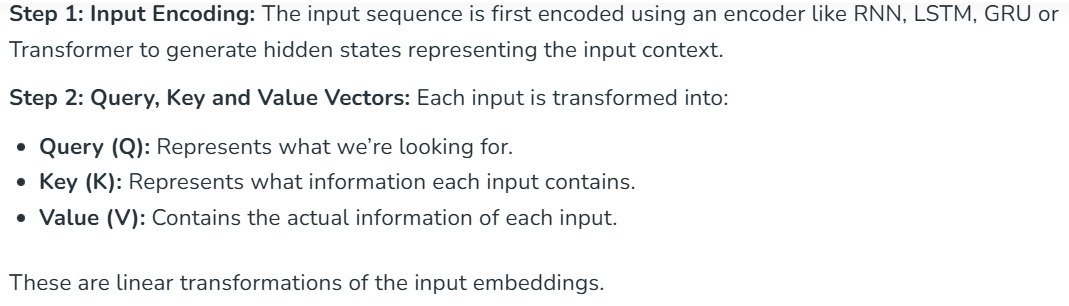
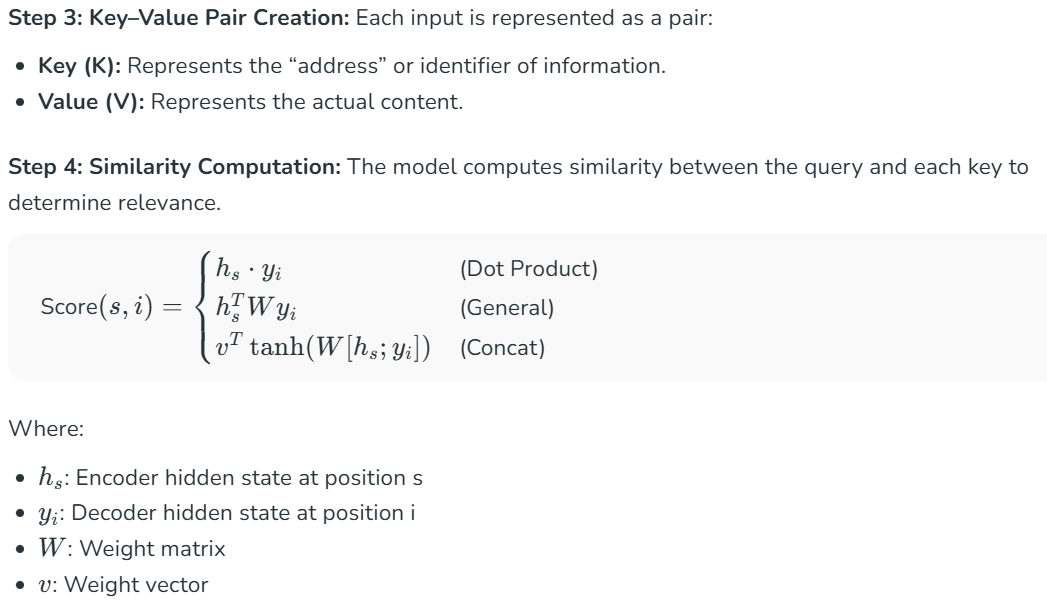
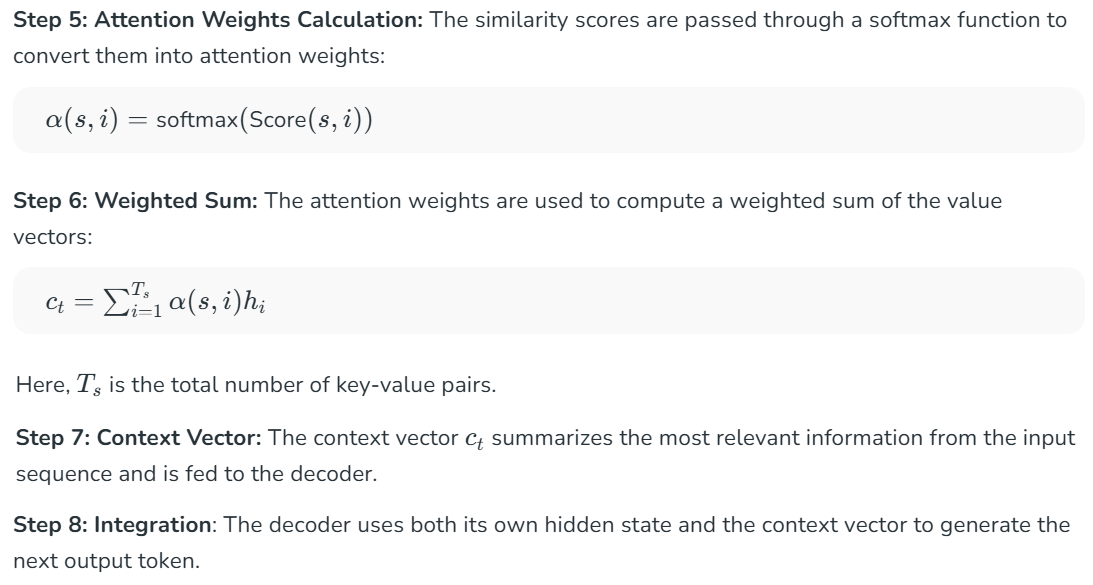

---



# Attention Mechanism Architecture

* Attention mechanism consists of three main components: Encoder, Attention and Decoder

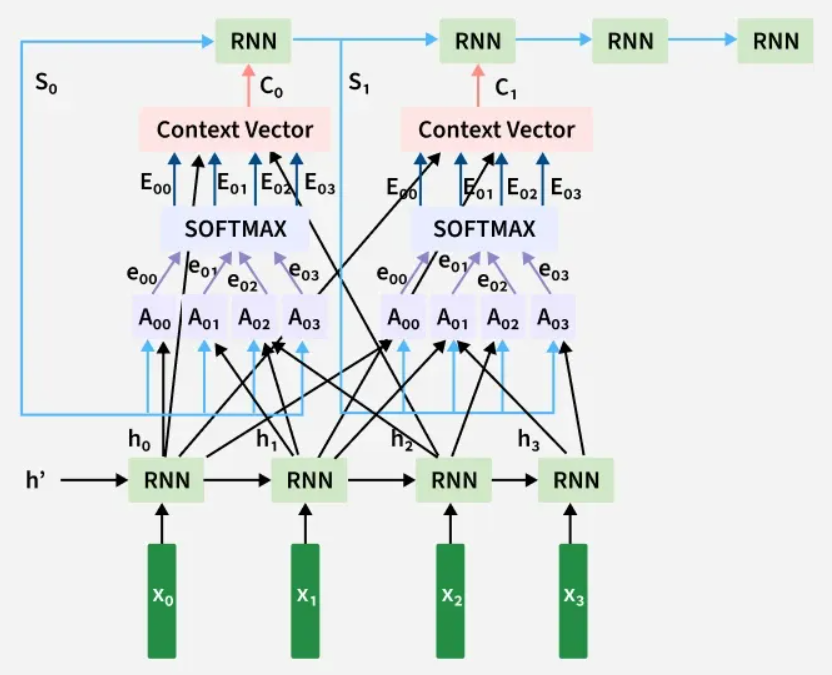

### 1. Encoder
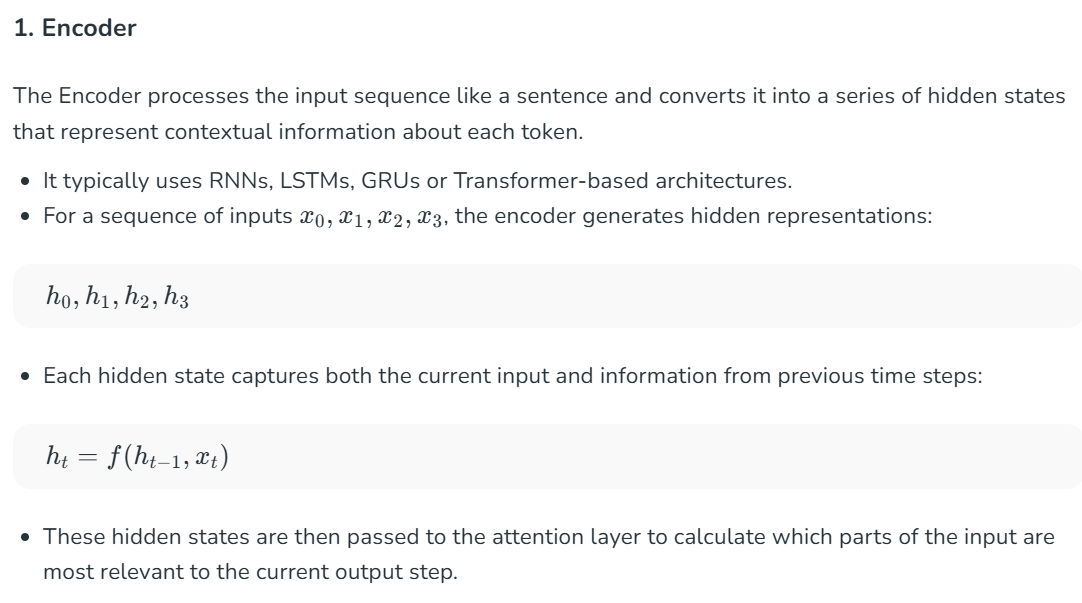

### 2. Attention Mechanism
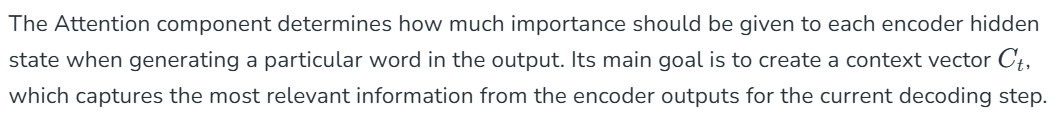
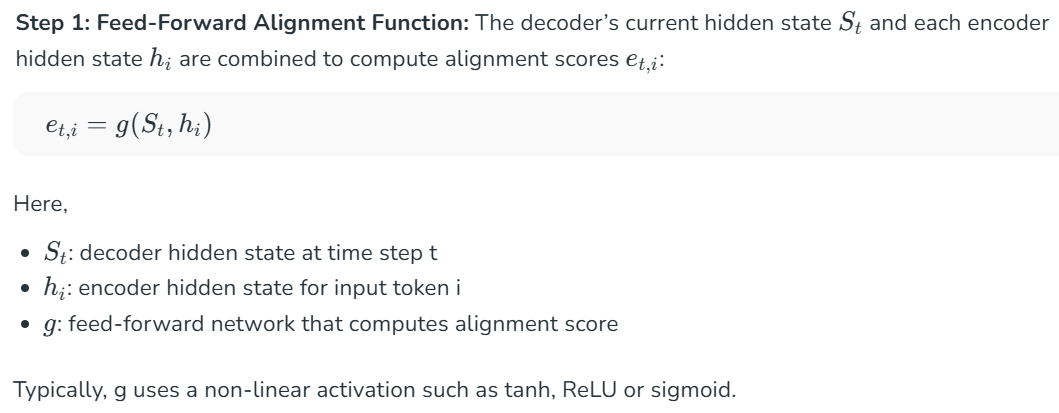
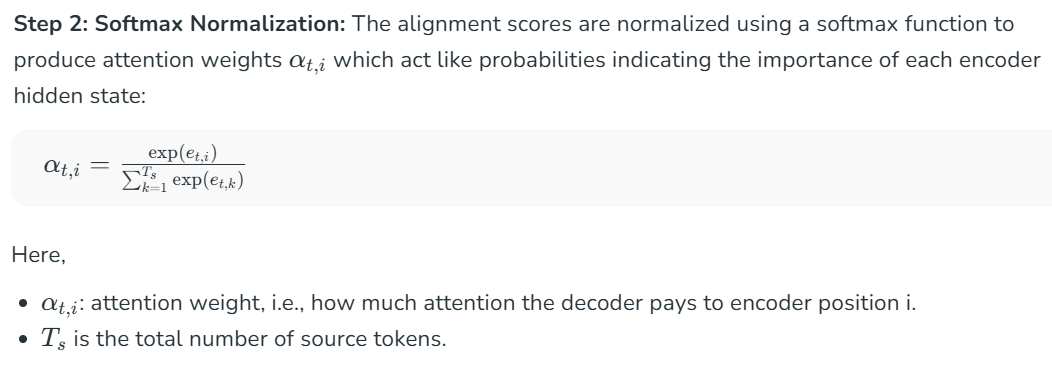
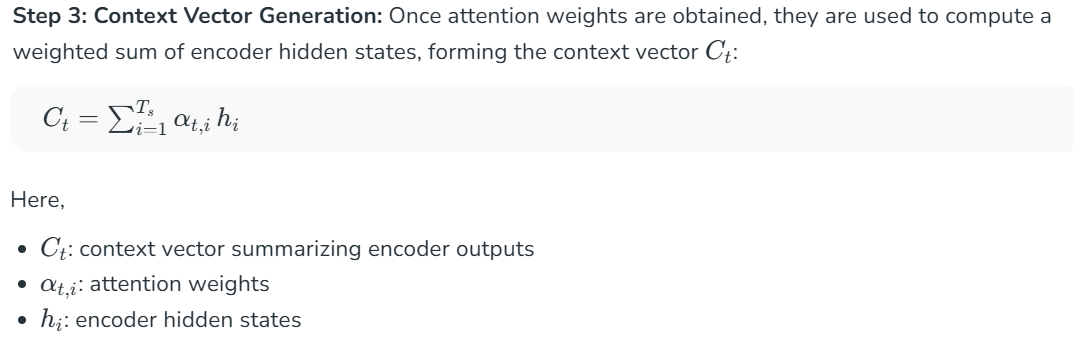

### 3. Decoder
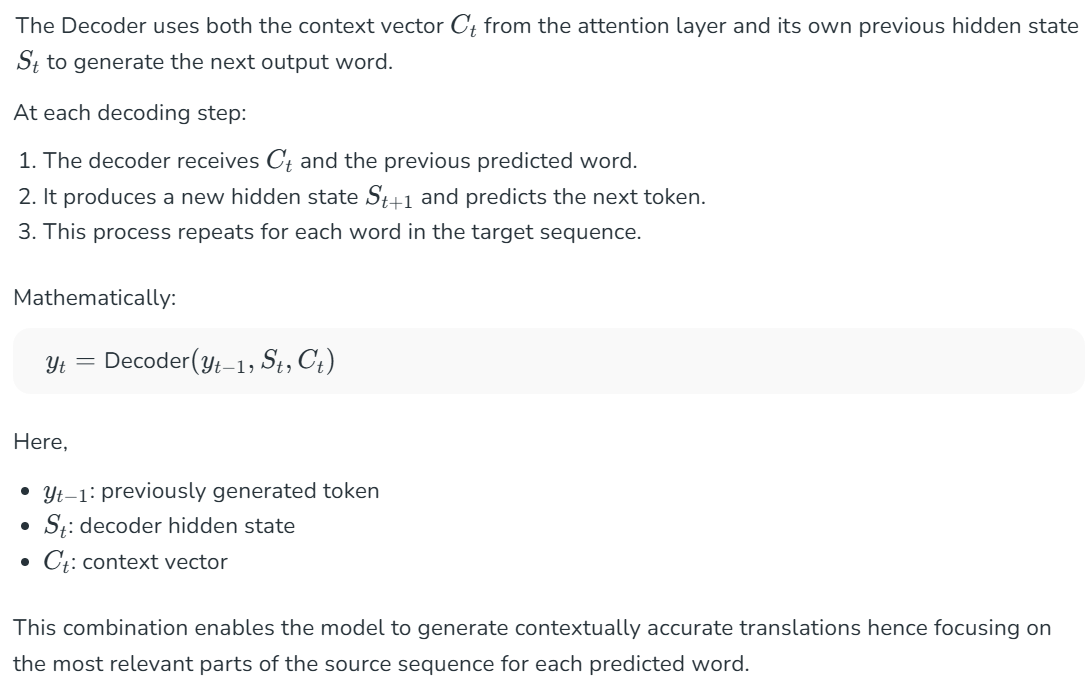


---

# How Attention Mechanism Improves Traditional Deep Learning Models

* Traditional deep learning models like RNNs, LSTMs and CNNs have limitations when handling long or complex dependencies. The attention mechanism enhances their effectiveness as follows:

1. RNNs/LSTMs: These models compress the entire input into one vector, causing information loss over long sequences. Attention dynamically focuses on the relevant parts, resolving long-term dependency issues.
2. CNNs: CNNs have fixed receptive fields and attention enables global dependencies, helping capture relationships beyond local patterns.
3. Seq2Seq Models: Replace single context vectors with multiple dynamic ones, improving translation accuracy.
4. General Advantage: Helps assign different importance weights to inputs, avoiding equal treatment of all tokens or features.

---

# Implementation

### Step 1: Define the Attention Class
Here:

* self.attn: learns a transformation from the concatenated decoder-hidden + encoder-output to an intermediate "energy" vector.
* self.v: a learnable vector that projects the energy vector to a scalar score for each time step.
* hidden.unsqueeze(1).repeat(1, seq_len, 1): broadcasts the decoder hidden state to align with every encoder time-step.
* torch.bmm(v, energy): computes the dot-product between v and the energy vectors across time steps for raw attention scores.
* F.softmax(..., dim=1): converts raw scores into a probability distribution (attention weights).
* torch.bmm(attention_weights.unsqueeze(1), encoder_outputs): produces the context vector (weighted sum of encoder outputs).

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim * 2, hidden_dim)
        self.v = nn.Parameter(torch.rand(hidden_dim))

    def forward(self, hidden, encoder_outputs):
        batch_size = encoder_outputs.shape[0]
        seq_len = encoder_outputs.shape[1]
        hidden = hidden.unsqueeze(1).repeat(1, seq_len, 1)
        energy = torch.tanh(
            self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
        energy = energy.permute(0, 2, 1)
        v = self.v.repeat(batch_size, 1).unsqueeze(1)
        attention_scores = torch.bmm(v, energy).squeeze(1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.bmm(attention_weights.unsqueeze(1), encoder_outputs)
        return context, attention_weights

### Step 2: Create Sample Input
Here:

* torch.manual_seed(0): makes the random tensors deterministic so outputs are repeatable.
* encoder_outputs: stands in for the sequence of encoder hidden states.
* decoder_hidden: the current decoder hidden state used as the Query to compute attention.

In [ ]:
torch.manual_seed(0)

batch_size = 1
seq_len = 4
hidden_dim = 8
encoder_outputs = torch.randn(batch_size, seq_len, hidden_dim)
decoder_hidden = torch.randn(batch_size, hidden_dim)

### Step 3: Initialize and Run Attention

1. Attention(hidden_dim): constructs the attention module with the chosen hidden dimension.

2. Calling the module returns:

* context: the context vector of shape [batch, 1, hidden_dim].
* attn_weights: the attention distribution over the seq_len encoder steps (shape [batch, seq_len]).

In [ ]:
attention = Attention(hidden_dim)
context, attn_weights = attention(decoder_hidden, encoder_outputs)

### Step 4: Inspect Result
* Inspecting attn_weights shows which encoder positions the module focused on (values sum to 1 across the sequence).
* context is the weighted sum of encoder outputs which we will pass into the decoder to inform the next prediction.

In [ ]:
print("Encoder Outputs:\n", encoder_outputs)
print("\nDecoder Hidden State:\n", decoder_hidden)
print("\nAttention Weights:\n", attn_weights)
print("\nContext Vector:\n", context)

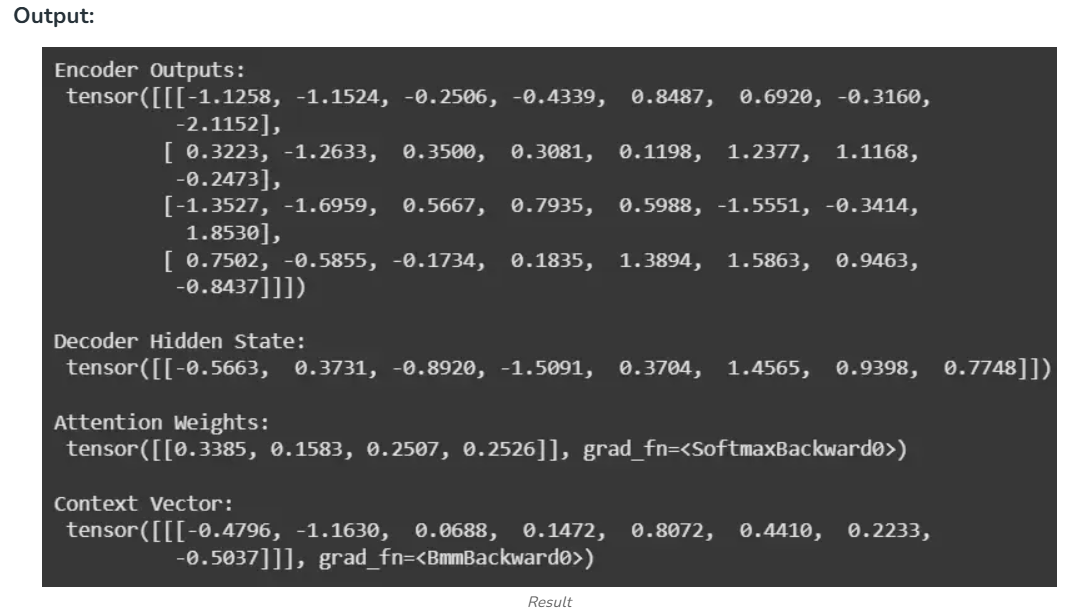

---